## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [70]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [71]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [72]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [73]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [74]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [75]:
df.query ('group == "treatment" and landing_page != "new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


f. Do any of the rows have missing values?

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [77]:
df_treatment = df.query('group == "treatment" and landing_page == "new_page"')

In [78]:
df_control = df.query('group == "control" and landing_page == "old_page"')

In [79]:
df2 = df_treatment.merge(df_control, how='outer')

In [80]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [81]:
df2.shape

(290585, 5)

In [82]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [83]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

Answer : 290584

In [84]:
###########################################################

b. There is one **user_id** repeated in **df2**.  What is it?

In [85]:
repeated_number = df2['user_id'].duplicated()
repeated_number
#repeated_number = df2.duplicated(subset=['user_id'], keep=False)
#repeated_number

0         False
1         False
2         False
3         False
4         False
          ...  
290580    False
290581    False
290582    False
290583    False
290584    False
Name: user_id, Length: 290585, dtype: bool

In [86]:
sum(repeated_number)

1

In [87]:
df2.user_id[df2['user_id'].duplicated(keep=False)]

938     773192
1404    773192
Name: user_id, dtype: int64

Answer : 773192

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

https://www.codegrepper.com/code-examples/delphi/how+to+find+duplicate+values+in+pandas+column

c. What is the row information for the repeat **user_id**? 

In [88]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [89]:
df2.shape

(290585, 5)

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [90]:
df2 = df2.drop([938])

In [91]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [92]:
df2['converted'].mean()

0.11959708724499628

Answer : 0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [93]:
df2_control = df2.query('group == "control"')
df2_control

,user_id,timestamp,group,landing_page,converted
145311,851104,2017-01-21 22:11:48.556739,control,old_page,0
145312,804228,2017-01-12 08:01:45.159739,control,old_page,0
145313,864975,2017-01-21 01:52:26.210827,control,old_page,1
145314,936923,2017-01-10 15:20:49.083499,control,old_page,0
145315,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [94]:
df2_control['converted'].mean()

0.1203863045004612

Answer : 0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [95]:
df2_treatment = df2.query('group == "treatment"')
df2_treatment

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
145306,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
145307,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
145308,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
145309,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [96]:
df2_treatment['converted'].mean()

0.11880806551510564

Answer : 0.11880806551510564

d. What is the probability that an individual received the new page?

In [97]:
len(df2_treatment.index)/len(df2.index)

0.5000619442226688

Answer : 0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From the previous results, I cannot fully say that the new treatment page leads to more conversions than the control page.
If we look at the rate of access to the new treatment page, we will see that it is 50%, and this gives an equal chance with the control page, and if we look more closely at the conversion rates, we will see that they are close to some extent, on the new treatment page we will see that the rate of conversions is 11.88 while Control Page 12.03, so these results are insufficient**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**To begin with, we will establish two hypotheses**

**The first hypothesis (the null hypothesis) if the old page is better unless proven otherwise, the average conversion rate on the old page will be higher than the new page.**

**The second hypothesis (the alternative hypothesis) If the new page is better than the old one, then the average conversion for the new page will be higher than the old page.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [98]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [99]:
p_old = df2.converted.mean() 
p_old

0.11959708724499628

c. What is $n_{new}$?

In [100]:
n_new = len(df2_treatment.index)#len(n_new)
n_new

145310

d. What is $n_{old}$?

In [101]:
n_old = len(df2_control.index) #len(n_old)
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [102]:
new_page_converted = np.random.binomial(1,p_new,n_new) 
new_page_converted.mean()

0.1186222558667676

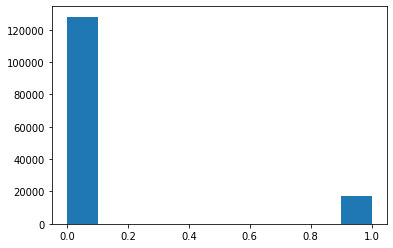

In [103]:
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [104]:
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11911973236780153

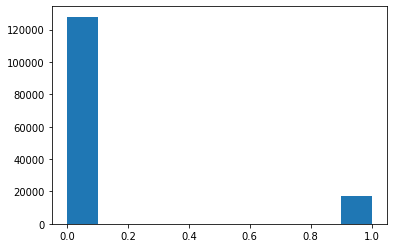

In [105]:
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [106]:
new_page_converted.mean() - old_page_converted.mean()

-0.0004974765010339333

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [107]:
new_page_converted = np.random.binomial(n_new, df2.converted.mean(),  10000)/n_new

old_page_converted = np.random.binomial(n_old, df2.converted.mean(),  10000)/n_old

p_diffs = new_page_converted - old_page_converted

In [108]:
p_diffs

array([ 0.00122311, -0.00041507,  0.00154687, ...,  0.00087184,
        0.00023175, -0.00136493])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [109]:
p_diffs_mean_value = np.array(p_diffs).mean()
p_diffs_mean_value

-2.718032974932681e-06

In [110]:
ab_data_diff = df2_treatment['converted'].mean() - df2_control['converted'].mean()
ab_data_diff

-0.0015782389853555567

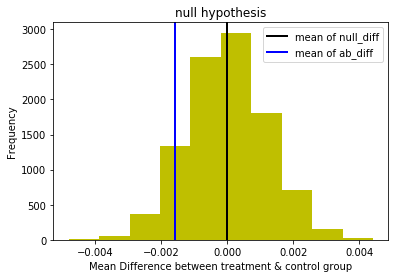

In [111]:
# low is the difference between treatment and control groups in ab_data
ab_diff = ab_data_diff

# low is the difference between treatment and control groups in null hypothesis
null_diff = np.array(p_diffs).mean()

plt.hist(p_diffs,color='y');
plt.title('null hypothesis')
plt.xlabel('Mean Difference between treatment & control group')
plt.ylabel('Frequency')
plt.axvline(x=null_diff, color='k', linewidth=2, label='mean of null_diff')
plt.axvline(x=ab_diff, color='b', linewidth=2, label='mean of ab_diff')
plt.legend()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [112]:
(p_diffs > ab_data_diff).mean()

0.9065

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In step j, I calculated the average value of the higher p_diffs than I looked at in ab_data_diff, which is the noticeable difference in the original data file.**

**scientific studies are p_value because it indicates the probability of observing the statistics provided that the first hypothesis (the null hypothesis) is completely correct.**

**This value means a lot, but by referring to the first hypothesis (the null hypothesis), it was stipulating that the average conversions will be higher than the new page, in other words, the difference between the average conversions on both pages will be either 0 or less, and therefore the p_value is very small.
But looking at the results, we will see that the difference is actually less than zero, but on the other hand, we will see that the p_value is large, and in this case we will be unable to ignore the first hypothesis (the null hypothesis)**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [113]:
import statsmodels.api as sm

convert_old = len(df2_control[df2_control['converted'] == 1])
convert_new = len(df2_treatment[df2_treatment['converted'] == 1])
n_old = len(df2_control.index)
n_new = len(df2_treatment.index)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [114]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**the value of z_score gives us an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.**

https://www.statisticshowto.com/probability-and-statistics/z-score/

**We can see that the value of z_score diverges from the mean and so for the value of p_value it is roughly equal to the value that we calculated in j and k**

**This is consistent with what we have computed above that we can not ignore the first hypothesis (the null hypothesis).**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.**
https://www.statsmodels.org/stable/regression.html

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In the beginning, it is preferable that we take a copy of the data to save the original copy for use again in other accounts, if any.

In [115]:
reg_data = df2.copy()

In [116]:
reg_data['intercept'] = 1
reg_data['ab_page'] = 0

In [117]:
reg_data.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0


In [118]:
#get the inex of the treatment group
ab_page_index = reg_data[reg_data['group']=='treatment'].index

In [119]:
ab_page_index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            145301, 145302, 145303, 145304, 145305, 145306, 145307, 145308,
            145309, 145310],
           dtype='int64', length=145310)

In [120]:
reg_data.loc[ab_page_index, "ab_page"] = 1

In [167]:
reg_data.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [177]:
# preparing the data
OLS_reg = sm.OLS(reg_data['converted'], reg_data[['intercept', 'ab_page']])

In [178]:
#to predict, we should fit the data
OLS_reg_fit = OLS_reg.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [179]:
# get the summary
linear_reg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Fri, 06 Nov 2020   Prob (F-statistic):              0.190
Time:                        07:45:21   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
ab_page_coef = 1/np.exp(-0.0016	)
ab_page_coef

1.0016012806829397

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**the p-value associated with ab_page is 0.190**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There are several factors that may be taken into consideration that can contribute to the results and make them more accurate and thus make the decision easier. But we must also consider that there are disadvantages of adding other factors, which is that it adds complexity to the model and thus may affect the basic factors, and thus the model will be weak and the results will not be sufficiently capable of us making the decision.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [141]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [142]:
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [143]:
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [174]:
#get the all countries in the dataframe 
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [145]:
### Create the necessary dummy variables
df_new[['UK','US','CA']] = pd.get_dummies(df_new['country'])

In [146]:
df_new.head()

,country,timestamp,group,landing_page,converted,UK,US,CA
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0


In [148]:
# let's consider US being our baseline, therefore, we drop US
df_new.drop(['US'], axis=1, inplace=True)

In [149]:
df_new.head()

,country,timestamp,group,landing_page,converted,UK,CA
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [175]:
#add intercept column and fitting 
df_new['intercept'] = 1

OLS_reg = sm.OLS(df_new['converted'], df_new[['intercept','UK', 'CA']])
results = OLS_reg.fit()

In [176]:
#get the results information (fitting information)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Fri, 06 Nov 2020   Prob (F-statistic):              0.201
Time:                        07:44:23   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1206      0.001    100.045      0.000       0.118       0.123
UK            -0.0053      0.003     -1.787      0.074      -0.011       0.001
CA            -0.0010      0.001     -0.746      0.455      -0.004       0.002
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
ca_coef = 1/np.exp(-0.0053)
ca_coef

1.0053140698457452

In [166]:
uk_coef = 1/np.exp(-0.0010)
uk_coef

1.0010005001667084

From the similarity of the results, then there is no influence of the countries on the conversion 

<a id='conclusions'></a>
## Conclusions



With reference to the main goal of this project is that one of the companies has two pages, one old and new being processed, and what is required is to know whether the new page has an effective enough effect to dispense with the old page or whether the old page is the best
In this project, three sections were worked out

- **Probability**
- **A/B Test**
- **Regression**

Let's start with the first section
- **Probability**

In the beginning the data was organized to be convenient to work with.
We found that the probability ratios are very close between the two pages (50%), and this was insufficient to make a decision based on these outcomes

- **A/B Test**

In the second section, we presented two hypotheses: the first is that the old page is better than the new if it is not proven that the new page is better than the old page, and the second hypothesis is that the new page is better than the old page. And we started working on the two hypotheses, but it became clear from the results that the first hypothesis could not be rejected.

- **Regression**


In this section, we started by choosing a statistical model to work on, where we chose linear regression.
The results were very much in agreement with the previous results. We also worked on some countries (Canada and the United Kingdom) and review their impact on the results, but the results were almost identical.


Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.